# Section 1.1: A deep(er) dive into joining and cleaning datasets

As a general rule, data scientists assume that about 80 percent of the time and effort devoted to a project will be spent preparing data for anlaysis. Because most real-world data is split among multiple existing datasets, this invariably means cleaning and joining diffent datasets together in the way that a data scientist needs for analysis. Thus, mastering these skills is essential for undertaking data science.

This section makes extensive use of pandas, the principal Python library for data handling and manipulation. Note that this section assumes some familiarity with pandas and basic Python skills.

In order to provide an experience more like real-world data science, we will use real data taken gathered from the [U.S. Department of Agriculture National Nutrient Database for Standard Reference](https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/nutrient-data-laboratory/docs/usda-national-nutrient-database-for-standard-reference/).

## Reminders about importing, built-in Help, and documentation

The standard convention in Python-centric data science is to import pandas under the alias `pd`, which is what we will use here:

In [131]:
import pandas as pd

Because this is such a common convention, it is the way we will use and refer to pandas throughout the rest of this section and this course. You should also adopt this usage in your own code to make it easily readable for other data scientists.

Pandas is a big package and there can be a lot to keep track of. Fortunately, IPython (the underlying program that powers this notebook and other like it) gives you the ability to quickly explore the contents of a package like pandas by using its tab-completion feature. If you want to see all of the functions available with pandas, type this:

```ipython
In [2]: pd.<TAB>

```

When you do so, a drop-down menu will appear next to the `pd`.

> **Exercise**

In [132]:
# Place your cursor after the period and press <TAB>:
pd.

# Now select an item using tab-completion and then add a period
# and use tab-completion to explore *that*.
# For example, you could try placing pressing <TAB> after:
# pd.DataFrame.


SyntaxError: invalid syntax (<ipython-input-132-3483b67029aa>, line 2)

As we progress through Section 1.1, don't forget that IPython also provides a tab-completion feature and function documentation with the `?` (question mark) character. If you don't understand something about a function you see in this section, taking a moment to csonult the documentation can help a great deal. You will find this documentation to be a very valuable reference source for your own data science work, both now and in the future. As a reminder, use this code to display the built-in pandas documentation:

```ipython
In [3]: pd?
```

> **Exercise**

> Run this code cell and review the documentation for the pandas DataFrame object. We are going to use it quite a bit.

In [133]:
pd?

## A brief reminder about Jupyter notebooks

This course makes extensive use of Jupyter notebooks hosted on Microsoft Azure. Azure-hosted Jupyter notebooks provide an easy way for you to experiment with programming concepts in an interactive fashion that requires no installation of software by students on local computers.

Jupyter notebooks are divided into cells. Each cell either contains text written in the Markdown markup language or a space in which to write and execute computer code. Because all the code resides inside code cells, you can run each code cell inline rather than using a separate Python interactive window.

> **Note**: This notebook is designed to have you run code cells one by one, and several code cells contain deliberate errors for demonstration purposes. As a result, if you use the **Cell** > **Run All** command, some code cells past the error won't be run. To resume running the code in each case, use **Cell** > **Run All Below** from the cell after the error.

## Loading data

> **Learning goal:** By the end of this subsection, you should be comfortable loading data from files into panda `DataFrame`s and troubleshooting any difficulties that might arise.

Because pandas `DataFrame`s are two-dimensional data structures, they are inherently similar to flat-file formats such as comma-separated value (CSV) files, the most common import and export format for spreadsheets and databases. Adding to this ease of translation from CSV files to `DataFrame`s, pandas provides a convenient function to load the contents of CSV files into `DataFrame`s (more convenient, in fact, then the native Python [CSV library](https://docs.python.org/3.6/library/csv.html)). Let's get comfortable with [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) because we will be using often.

In [134]:
df = pd.read_csv('Data/USDA-nndb.csv')

You might encounter an error after running this cell. One of the error messages could be:

`UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 2: invalid continuation byte`

If this is the case, the data in the CSV file uses a character that the default Unicode Standard ([UTF-8](https://en.wikipedia.org/wiki/UTF-8)) codec reading this file doesn't understand. Remember, this is real-world data and the real world is a messy place.

It's time to use the pd.read_csv documentation to look for ideas on what to try next.

> **Exercise**

> Use the built-in IPython documentation to on `pd.read_csv.`

In [135]:
# Hint: Refer to the discussion at the start of this section if
# you forgot the syntax.
pd.read_csv?

There are quite a few of parameters for this function. The intuitively named `encoding` parameter accepts `str` input from the list of Python [standard encodings](https://docs.python.org/3.6/library/codecs.html#standard-encodings). We will go with `'latin_1'` here.

**Note:** Although data-science practitioners do develop a familiarity with different encodings they have encountered, selecting the correct encoding can sometimes come down to trial and error, even for professionals!

In [136]:
df = pd.read_csv('Data/USDA-nndb.csv', encoding='latin_1')

If you encountered the error message above,`'latin_1'` might have done the trick and we can successfully read in the CSV file to the `df` `DataFrame`.

> **Takeaway:** There is a saying that the difference between data science in academia and the real world is that academia likes to do complex analysis on clean datasets, whereas the real world often does simpler analysis on messier datasets. Troubleshooting difficulties — even ones encountered while merely loading your data — is a large part of successful data science.

## Exploring and cleaning data
**Explore data**

> **Learning goal:** By the end of this subsection, you should be comfortable performing simple exploration of your data and performing simple cleaning steps on it to prepare it for later analysis.

Data you'll be working with is typically in formats not necessarily designed for human consumption. Fortunately, `DataFrame` offers several tools for exploring the data. Let's explore the data we imported.

In [137]:
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(ï¿½g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


### See statistical properties of columns
We can get a statistical distribution overview by using the ```describe()``` method:

In [138]:
df.describe()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_D_ï¿½g,Vit_D_IU,Vit_K_(ï¿½g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
count,8790.000000,8789.000000,8790.000000,8790.000000,8790.000000,8465.000000,8790.000000,8196.000000,6958.000000,8442.000000,...,5528.000000,5579.000000,5227.000000,8441.000000,8124.000000,8125.000000,8380.000000,8490.000000,4825.000000,8740.000000
mean,15663.495222,54.112218,226.317634,11.342849,10.553725,1.783468,22.127710,2.187445,8.543066,76.738214,...,0.579269,22.990142,15.631586,3.576334,4.081006,2.288767,40.613246,96.395130,250.747668,4.964416
std,9251.413586,30.772854,169.877539,10.530474,15.814842,3.004609,27.270822,4.383138,14.923626,203.527453,...,3.882702,154.614465,79.949125,6.518840,7.010760,5.215654,119.869371,84.337063,382.226774,12.088471
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.400000,0.000000
25%,9086.250000,29.700000,91.000000,2.380000,0.950000,0.840000,0.050000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.200000,0.220000,0.235750,0.220000,0.000000,29.000000,42.000000,0.000000
50%,14427.500000,63.080000,191.000000,8.000000,5.140000,1.200000,9.340000,0.700000,1.840000,21.000000,...,0.000000,0.000000,1.600000,1.592000,1.938500,0.696000,4.000000,85.000000,164.000000,0.000000
75%,20142.750000,77.960000,337.000000,19.880000,13.720000,2.090000,34.910000,2.600000,9.287500,69.000000,...,0.200000,6.000000,5.200000,4.345000,5.115000,2.081000,67.000000,130.000000,305.000000,0.000000
max,93600.000000,100.000000,902.000000,88.320000,100.000000,99.800000,100.000000,79.000000,99.800000,7364.000000,...,250.000000,10000.000000,1714.500000,95.600000,83.689000,74.623000,3100.000000,1184.000000,5717.000000,81.000000


* **count:** Total number of rows
<br>
* **mean:** Average 
<br>
* **std:** Measure of how close the values are to the mean (average distance).
<br>
* **min:** The minimum value 
<br>
* **25%:** 25th percentile
<br>
* **50%:** 50th percentile
<br>
* **75%:** 75th percentile
<br>
* **max:** The maximum value 
<br>

You can also find out more about the ```describe``` method by running the cell below with ```df.describe?```

In [139]:
df.describe?

We will now import a Python data visualization library called ```seaborn```
<br>
Seaborn is based on ```matplotlib```, another Python data visualization library.
<br>
The standard convention is to import ```seaborn``` under the alias ```sns```, which is what we will use here:

In [140]:
import seaborn as sns

We will now use ```sns.pairplot(df)``` to see connections in our dataset, but before we continue with that we need to make our dataset smaller. Otherwise ```sns.pairplot(df)``` wont be able to read in all the huge amount of data and we can't see the connections.
<br>
<br>
We will use NumPy (Numeric Python), a library for scientific computing. The reason we want to use NumPy is that it's much faster than regular Python lists.
<br>
The standard convention is to import ```numpy``` under the alias ```np```.

In [141]:
import numpy as np

In [142]:
# Function to sample a smaller set from our df 
def random_rows(number_of_samples):
  indices = np.random.choice(np.arange(len(df)), number_of_samples)
  return indices

# See 10 random samples from the DataFrame
random_rows(10)

array([ 293, 7321, 5630,  297, 1441, 4881, 8683, 1903, 8331, 6185])

We will now use our random_rows() function and select 10 random samples (indexes) from our DataFrame by using ```df.iloc```. You will learn more about ```df.iloc``` in the section **Splitting the DataFrame**.
<br>

```df.iloc[random_rows(10), :5]``` = ```data.iloc[<row selection>, <column selection>]```
<br><br>
We are choosing random row selections(10) and then adding our column selection (5), and we will save it in a variable called ```sample_df```.



In [143]:
sample_df = df.iloc[random_rows(10), :5]

# Let's have a look at our sample df
sample_df

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g)
4833,16096,"PEANUTS,VIRGINIA,OIL-ROASTED,W/SALT",2.17,578,25.87
5704,18193,"COOKIES,SHORTBREAD,COMMLY PREP,PECAN",3.30,542,4.90
4780,16042,"BEANS,PINTO,MATURE SEEDS,RAW",11.33,347,21.42
6028,18980,"KASHI,ORIGINAL WAFFLE",47.70,197,6.00
4479,14649,"BEVERAGES,TEA,HIBISCUS,BREWED",99.58,0,0.00
3899,13456,"BEEF,TOP SIRLOIN,STEAK,LN,0"" FAT,SEL,CKD,BRLD",63.58,177,30.80
829,5007,"CHICKEN,BROILERS OR FRYERS,MEAT&SKN,CKD,FRIED,...",49.39,289,22.54
4639,15162,"CLAM,MXD SP,CND,LIQ",97.70,2,0.40
6744,21162,"FAST FOODS,SUBMARINE SNDWCH,BACON,LETTUCE,& TO...",55.03,205,10.06
1211,6009,"SOUP,BF NOODLE,CND,COND",84.42,67,3.85


### See the connections / pattern in your data
Now we are ready to use ```sns.pairplot(sample_df)``` to see the connections in our dataset.

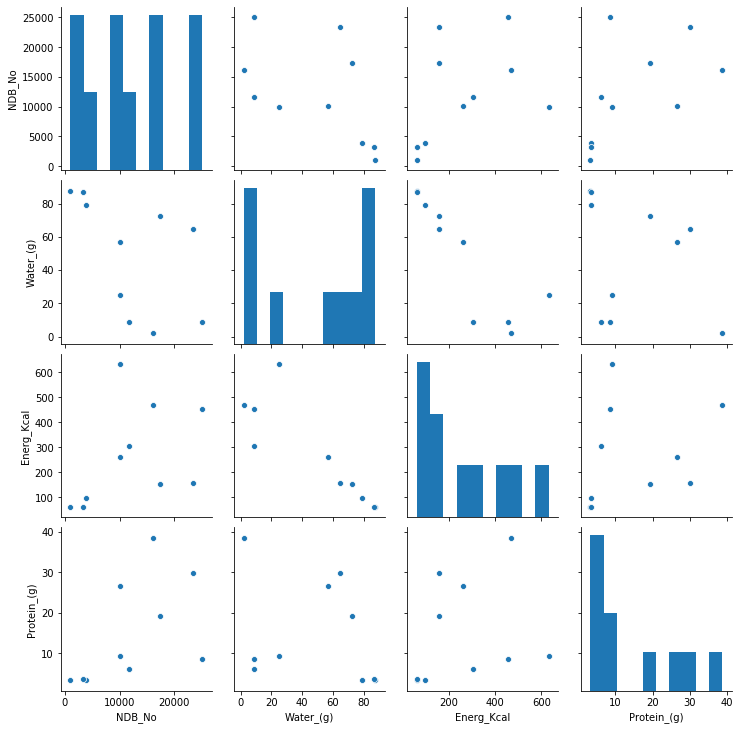

In [109]:
sns.pairplot(sample_df)

```sns.pairplot(sample_df)```will give us 2 different figures: 
<br>
* Scatterplots for joint connections 
* Histograms for the distribution of every variable

### Explore correlations more simply
We can explore correlations (connections) more simply by using ```df.corr()```
<br>
This will show correlations in something called **r**.
<br>
**r** is displayed as values -1 to +1. Relationship is stronger the closer these numbers are to either -1 or +1, and it will be a negative correlation for minus values and positive correlation for plus values.
<br><br>
```style.background_gradient``` is used to color the background, link to documentation [here](https://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.core.style.Styler.background_gradient.html).

In [31]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

### Get statistical distribution of columns
A histogram will group the values from our columns into bins. The height of the bin will show how many falls into the same range.

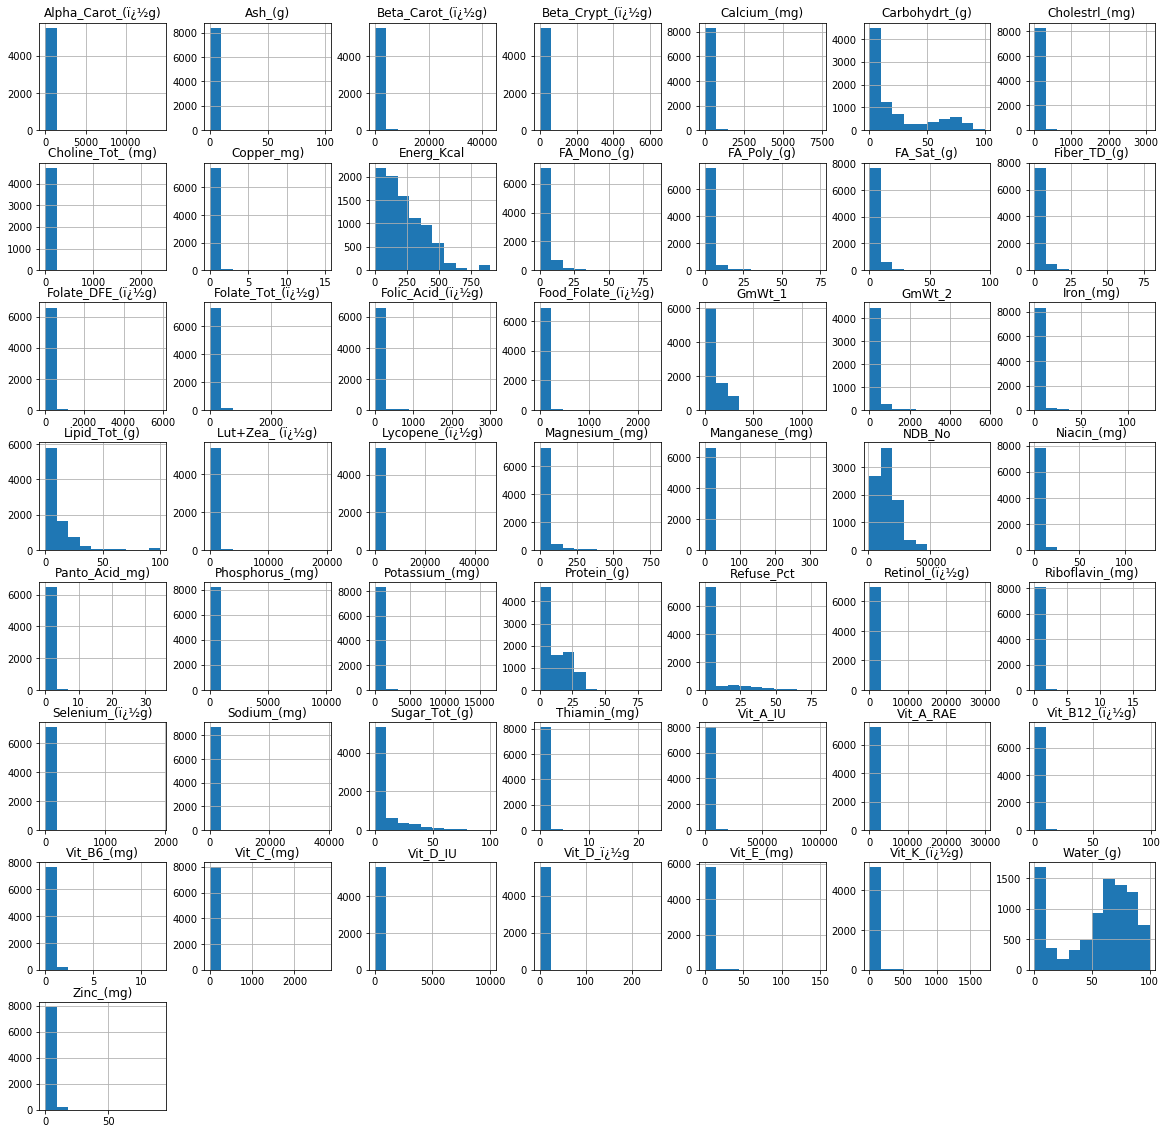

In [121]:
#import matplotlib.pyplot as plt
df.hist(figsize=(20,20));

### Check data types and null values.
We can get some aggregated information about the `DataFrame` by using its `info()` method:

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NDB_No              8790 non-null   int64  
 1   Shrt_Desc           8790 non-null   object 
 2   Water_(g)           8789 non-null   float64
 3   Energ_Kcal          8790 non-null   int64  
 4   Protein_(g)         8790 non-null   float64
 5   Lipid_Tot_(g)       8790 non-null   float64
 6   Ash_(g)             8465 non-null   float64
 7   Carbohydrt_(g)      8790 non-null   float64
 8   Fiber_TD_(g)        8196 non-null   float64
 9   Sugar_Tot_(g)       6958 non-null   float64
 10  Calcium_(mg)        8442 non-null   float64
 11  Iron_(mg)           8646 non-null   float64
 12  Magnesium_(mg)      8051 non-null   float64
 13  Phosphorus_(mg)     8211 non-null   float64
 14  Potassium_(mg)      8364 non-null   float64
 15  Sodium_(mg)         8707 non-null   float64
 16  Zinc_(

Just quickly inspecting the columns from `df` we can see that almost all of the columns have a number of null values. Those missing values are not an issue for us right now, but they will pose a challenge in future sections (but we will deal with them in those sections).

### Evaluate duplicate entries
Let's also check to see if this `DataFrame` has any duplicate values in it. Let's start by exploring the `duplicated` method.

In [34]:
df.duplicated?

In [111]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Length: 8790, dtype: bool

You'll notice the results from `duplicated` shows the result on a row by row basis. Not exactly the most efficient way of determining if there's duplicated rows. One quick trick we can use is to call `sum`, which will add the values of the results, where `False` will be **0** and `True` will be **1**. The end result will be we will get a rough sense if there's any duplicated rows.

In [112]:
df.duplicated().sum()

0

Given the nature of the data source (a government reference database) it makes sense that there are no duplicate entries. For purposes of learning more about cleaning data, let's make a mess so we can see how we can clean it up! Let's start by duplicating data by using the `append()` method.

In [113]:
df = df.append(df, ignore_index=True)

The `append()` method has basically stacked the `DataFrame` by appending a copy of `df` to the end of the `DataFrame`. (In SQL terms, we performed a [UNION](https://www.w3schools.com/sql/sql_union.asp)). The `ignore_index=True` parameter means that the internal index numbering for the newly doubled `DataFrame` continues seamlessly.

Now let's look directly at how many times individual values in a column (such as `NDB_No`, which is a key) are duplicated. We'll use the `groupby` function to create a "group" for each instance of `NDB_No`, and then we'll count each instance.

In [114]:
df.groupby('NDB_No')['NDB_No'].count()

NDB_No
1001     2
1002     2
1003     2
1004     2
1005     2
        ..
83110    2
90240    2
90480    2
90560    2
93600    2
Name: NDB_No, Length: 8790, dtype: int64

### Remove duplicates
Given that we duplicated the original dataset, two duplicates of everything is not unexpected. However, these duplicate values will pose a problem for us later in the section if not dealt with, so let's take care of them now:

In [115]:
df = df.drop_duplicates('NDB_No', keep="last")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 8790 to 17579
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NDB_No              8790 non-null   int64  
 1   Shrt_Desc           8790 non-null   object 
 2   Water_(g)           8789 non-null   float64
 3   Energ_Kcal          8790 non-null   int64  
 4   Protein_(g)         8790 non-null   float64
 5   Lipid_Tot_(g)       8790 non-null   float64
 6   Ash_(g)             8465 non-null   float64
 7   Carbohydrt_(g)      8790 non-null   float64
 8   Fiber_TD_(g)        8196 non-null   float64
 9   Sugar_Tot_(g)       6958 non-null   float64
 10  Calcium_(mg)        8442 non-null   float64
 11  Iron_(mg)           8646 non-null   float64
 12  Magnesium_(mg)      8051 non-null   float64
 13  Phosphorus_(mg)     8211 non-null   float64
 14  Potassium_(mg)      8364 non-null   float64
 15  Sodium_(mg)         8707 non-null   float64
 16  Zi

The `DataFrame` is now half of its previous size, which is what we would expect. However, look at this line in the `df.info()` output:

`Int64Index: 8790 entries, 8790 to 17579`

Remember, counting starts with zero. But while there are only now 8790 entries per column, the indexing for the DataFrame does not run 0 through 8789, as we might have expected. We can see this more directly by looking at the `head` of the redacted `DataFrame`:

In [116]:
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(ï¿½g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
8790,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
8791,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
8792,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
8793,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
8794,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


> **Question**
>
> Is this behavior of the `drop_duplicates()` method not updating the index values of the `DataFrame` surprising or unexpected for you? Can you explain why this method behaves as it does in this case? If not, study the documentation for this method by using `df.drop_duplicates?` in the code cell below until you're satisfied with your understanding of this behavior.

In [117]:
df.drop_duplicates?

> **Takeaway:** Duplicate, `Null`, and `NaN` values can all complicate (if not derail) your analysis. Learning how to identify and remove these problems is a huge part of successfully performing data science.

## Splitting `DataFrame`s

> **Learning goal:** By the end of this subsection, you should be comfortable selecting and dropping specific columns from a `DataFrame`.

It might seem strange to discuss splitting a `DataFrame` in a course section on joining them, but we'll do so here to create the `DataFrame`s that we'll join later on. We take this approach for two reasons:

1. Creating our own `DataFrame`s gives us easy control over the content of the child `DataFrame`s to best demonstrate aspects of joining datasets.
2. Because we have a baseline, joined `DataFrame` (`df`), it's easy to see how different methods of joining the child `DataFrame`s produce different results.

We're going to create two child `DataFrame`s, `df1` and `df2`. `df1` will contain the first 35 columns of our data, while `df2` will contain the rest. This will allow us to explore how we can manipulate and manage columns in a dataset, and to simulate a common scenario where some of the data you need is in one location, while the rest is in a different location.

### `DataFrame.iloc`
Manipulate DataFrame rows and columns by index number.

In [164]:
df1 = df.iloc[:,:35]

> **Exercise**

> Why did we use syntax `df1 = df.iloc[:,:35]` to capture the first 35 columns of `df`? What does the first `:` (colon) in the square brackets do? Experiment with `df3 = df.iloc[:35]` in the code cell below and compare `df3.info()` with `df1.info()` to satisfy yourself as to why we need to use this syntax.

In [55]:
df.iloc?

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 8790 to 17579
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NDB_No              8790 non-null   int64  
 1   Shrt_Desc           8790 non-null   object 
 2   Water_(g)           8789 non-null   float64
 3   Energ_Kcal          8790 non-null   int64  
 4   Protein_(g)         8790 non-null   float64
 5   Lipid_Tot_(g)       8790 non-null   float64
 6   Ash_(g)             8465 non-null   float64
 7   Carbohydrt_(g)      8790 non-null   float64
 8   Fiber_TD_(g)        8196 non-null   float64
 9   Sugar_Tot_(g)       6958 non-null   float64
 10  Calcium_(mg)        8442 non-null   float64
 11  Iron_(mg)           8646 non-null   float64
 12  Magnesium_(mg)      8051 non-null   float64
 13  Phosphorus_(mg)     8211 non-null   float64
 14  Potassium_(mg)      8364 non-null   float64
 15  Sodium_(mg)         8707 non-null   float64
 16  Zi

## Let's create df2

We'll create `df2` in a similar manner to `df1`, but we need to do things a little differently here to ensure that the first columne (`NDB_No`) makes it into `df2`. This is going to serve as the column that's common to both child `DataFrame`s when we join them later in this section.

We also want to populate `df2` with a different number of rows than `df1`, again simulating real world scenarios. Doing so will make is easier to demonstrate what goes on with some of the join techniques shown below.

In [120]:
df2 = df.iloc[0:2000, [0]+[i for i in range(35,53)]]

> **Question**

> If you're unsure about why we use `[0] + [i for i in range(35,53)]` in the list comprehension above, review the documentation for the `range()` function using `range?` in the code cell below. You may want to run `[0] + [i for i in range(35,53)]` in the cell below as part of your exploration, and play around with adding (or concatenating) arrays. And remember Python uses zero-based indexing.

In [58]:
range?

We can examine `df2` by using the `head()` and `info()` methods.

In [121]:
df2.head()

,NDB_No,Alpha_Carot_(ï¿½g),Beta_Carot_(ï¿½g),Beta_Crypt_(ï¿½g),Lycopene_(ï¿½g),Lut+Zea_ (ï¿½g),Vit_E_(mg),Vit_D_ï¿½g,Vit_D_IU,Vit_K_(ï¿½g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
8790,1001,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
8791,1002,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
8792,1003,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
8793,1004,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
8794,1005,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [122]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 8790 to 10789
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NDB_No              2000 non-null   int64  
 1   Alpha_Carot_(ï¿½g)  1426 non-null   float64
 2   Beta_Carot_(ï¿½g)   1447 non-null   float64
 3   Beta_Crypt_(ï¿½g)   1425 non-null   float64
 4   Lycopene_(ï¿½g)     1426 non-null   float64
 5   Lut+Zea_ (ï¿½g)     1418 non-null   float64
 6   Vit_E_(mg)          1456 non-null   float64
 7   Vit_D_ï¿½g          1289 non-null   float64
 8   Vit_D_IU            1289 non-null   float64
 9   Vit_K_(ï¿½g)        1359 non-null   float64
 10  FA_Sat_(g)          1965 non-null   float64
 11  FA_Mono_(g)         1823 non-null   float64
 12  FA_Poly_(g)         1825 non-null   float64
 13  Cholestrl_(mg)      1947 non-null   float64
 14  GmWt_1              1967 non-null   float64
 15  GmWt_Desc1          1967 non-null   object 
 16  Gm

Let’s take a look at `df1`.

In [123]:
df1.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_B6_(mg),Folate_Tot_(ï¿½g),Folic_Acid_(ï¿½g),Food_Folate_(ï¿½g),Folate_DFE_(ï¿½g),Choline_Tot_ (mg),Vit_B12_(ï¿½g),Vit_A_IU,Vit_A_RAE,Retinol_(ï¿½g)
8790,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0
8791,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0
8792,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0
8793,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0
8794,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0


You'll notice on that both `DataFrame`s have their old indices indexes that they inherited from  `df`. We can fix that by using the `reset_index()` method, but then we run into a problem.

In [124]:
df1 = df1.reset_index()
df1.head()

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_B6_(mg),Folate_Tot_(ï¿½g),Folic_Acid_(ï¿½g),Food_Folate_(ï¿½g),Folate_DFE_(ï¿½g),Choline_Tot_ (mg),Vit_B12_(ï¿½g),Vit_A_IU,Vit_A_RAE,Retinol_(ï¿½g)
0,8790,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0
1,8791,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0
2,8792,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0
3,8793,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0
4,8794,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0


Our old indexes are still there for `df1`, but now they're in a new column titled `index`. pandas doesn't want to delete data we might need. We can instruct pandas to remove the column, which we know is unnecessary, by using the `drop=True` parameter for the method. (We also need to drop the `index` column we just created in the prior step.)

In [125]:
df1 = df1.drop(['index'], axis=1) #remove the index we created previously
df1 = df1.reset_index(drop=True) #reset the index and tell pandas not to create the copy
df1.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_B6_(mg),Folate_Tot_(ï¿½g),Folic_Acid_(ï¿½g),Food_Folate_(ï¿½g),Folate_DFE_(ï¿½g),Choline_Tot_ (mg),Vit_B12_(ï¿½g),Vit_A_IU,Vit_A_RAE,Retinol_(ï¿½g)
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0


Now let's do the same thing to `df2`.

In [126]:
df2 = df2.reset_index(drop=True)
df2.head()

,NDB_No,Alpha_Carot_(ï¿½g),Beta_Carot_(ï¿½g),Beta_Crypt_(ï¿½g),Lycopene_(ï¿½g),Lut+Zea_ (ï¿½g),Vit_E_(mg),Vit_D_ï¿½g,Vit_D_IU,Vit_K_(ï¿½g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


For practice, let's export these `DataFrame`s to CSV files by using the `to_csv()` method. Note that unless we explicitly tell pandas not to, it will also export the index as a column in the CSV file. We will also need to be careful to explicitly encode our CSV to UTF-8.

In [ ]:
df1.to_csv('Data/NNDB1.csv', sep=',', encoding='utf-8',index=False)

> **Exercise**

In [ ]:
# Export df2 to a CSV file.


### DataFrame filters
**Subset / sample a dataframe using filters**

We can filter our dataframe using `df.filter('insert condition')` 
<br>
Run the cell below with ```df.filter?``` to see more information about this filter method.

In [82]:
df.filter?

In [144]:
# Have a look at our sample_df
sample_df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g)
4833,16096,"PEANUTS,VIRGINIA,OIL-ROASTED,W/SALT",2.17,578,25.87
5704,18193,"COOKIES,SHORTBREAD,COMMLY PREP,PECAN",3.30,542,4.90
4780,16042,"BEANS,PINTO,MATURE SEEDS,RAW",11.33,347,21.42
6028,18980,"KASHI,ORIGINAL WAFFLE",47.70,197,6.00
4479,14649,"BEVERAGES,TEA,HIBISCUS,BREWED",99.58,0,0.00


In [146]:
# Filter column Water_(g)
sample_df.filter(items=['Water_(g)'], axis=1)

,Water_(g)
4833,2.17
5704,3.30
4780,11.33
6028,47.70
4479,99.58
3899,63.58
829,49.39
4639,97.70
6744,55.03
1211,84.42


Remember:
* axis=0: row
* axis=1: column

In [147]:
# We can also use this filter method
sample_df.filter(like='En', axis=1)

,Energ_Kcal
4833,578
5704,542
4780,347
6028,197
4479,0
3899,177
829,289
4639,2
6744,205
1211,67


* axis = 0: **row**
* axis = 1: **column**

### More flexible filters / samples
We can also by using `df[df.column_name == "some value"]`

In [96]:
# All rows with Energy_Kcal equal to 609
df[df.Energ_Kcal == 609]

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(ï¿½g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
3728,12588,"CASHEW BUTTER,PLN,W/SALT",2.34,609,12.12,53.03,2.50,30.30,3.0,9.09,...,30.3,10.606,26.709,13.371,0.0,16.0,1 tbsp,28.35,1 oz,0.0
6071,19029,"TOPPING,SMUCKER'S MAGIC SHELL",0.25,609,2.94,44.10,2.64,50.07,2.9,47.06,...,1.8,20.590,6.156,15.094,2.0,NaN,NaN,NaN,NaN,0.0


> **Takeaway:** Although it's not common in the real world to split `DataFrame`s only to re-merge them later, you'll need to drop columns or create new `DataFrame`s that contain only the information you need. With truly large datasets, this is not just a convenience for you analysis, but a necessity for memory and performance!

## Joining `DataFrame`s

> **Learning goal:** By the end of this subsection, you should be comfortable performing left, right, inner, and outer merges on `DataFrame`s.

We'll examine the  most commonly used `DataFrame` function for joining datasets: `merge()`. But first, let's refresh ourselves on the shapes of our two `DataFrame`s so that the output of our joining makes more sense. This will display the number of rows and columns in each `DataFrame`.

In [127]:
df1.shape

(8790, 35)

In [128]:
df2.shape

(2000, 19)

The type of dataset join that’s most widely used by practicing data scientists is the left join. If you already have some experience with SQL, you know what this refers to. Basically, a left join is a join that takes all of the data from one `DataFrame` (think of it as the left set in a Venn diagram) and merges it with everything that it has in common with another `DataFrame` (the intersection with the right set in the same Venn diagram).

We do this using the `merge()` function. We also need to specify the type of join we want to perform by using the `how` parameter, as well as the index on which to join the `DataFrames` by using the `on` parameter.

In [129]:
# Similar to the SQL:
# FROM df1 LEFT JOIN df2 ON df1.NBD_No = df2.NBD_No

left_df = pd.merge(df1, df2, how='left', on='NDB_No')
left_df.shape

(8790, 53)

> **Question**

> Is the shape of the resulting `DataFrame` what you were expecting? Why or why not?

Now let's compare this to the original `df` `DataFrame`.

In [130]:
df.shape

(8790, 53)

> **Question**

> The shapes are the same, but do you expect `df` and `left_df` to be identical? If so, why? If not, what differences do you expect there to be between them?

Let's check to see what the differences between these `DataFrame`s might be.

In [131]:
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(ï¿½g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
8790,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
8791,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
8792,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
8793,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
8794,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [132]:
left_df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(ï¿½g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


The indexes notwithstanding, the first five rows of both `DataFrame`s are the same. Let's check the last five rows.

In [133]:
df.tail()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(ï¿½g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
17575,83110,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,0.0,...,7.8,7.148,8.320,6.210,95.0,80.0,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0
17576,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,0.0,...,0.0,0.218,0.082,0.222,41.0,85.0,3 oz,NaN,NaN,0.0
17577,90480,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,73.2,...,0.0,0.000,0.000,0.000,0.0,21.0,1 serving,NaN,NaN,0.0
17578,90560,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,0.0,...,0.1,0.361,0.259,0.252,50.0,85.0,3 oz,NaN,NaN,0.0
17579,93600,"TURTLE,GREEN,RAW",78.50,89,19.80,0.50,1.20,0.00,0.0,0.0,...,0.1,0.127,0.088,0.170,50.0,85.0,3 oz,NaN,NaN,0.0


In [134]:
left_df.tail()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(ï¿½g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
8785,83110,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8787,90480,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,73.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8788,90560,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8789,93600,"TURTLE,GREEN,RAW",78.50,89,19.80,0.50,1.20,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are differences here in the last five rows. Notice that the right-most columns of `left_df` contain have Not a Number (`NaN`) values. This is because the left `DataFrame` was larger than the right `DataFrame`. If you recall, we only took the first 2,000 rows from `df2`.

> **Exercise**

> A right join is simply the mirror image of a left join in which those entries from the left `DataFrame` that are common with the right `DataFrame` are merged with the right `DataFrame`.
>
>Perform a right join of `df1` and `df2` in the code cell below. But before you do that, ask yourself what shape you expect the resulting `DataFrame` to have? Do you expect it to have any `NaN` values?

In [ ]:
# Hint: the parameter for the right join is how='right'


### Inner join
Another intuitive and widely used type of join is the inner join. This join simply merges entries that are common to both `DataFrame`s, resulting in a `DataFrame` that has no `NaN` values.

In [135]:
inner_df = pd.merge(df1, df2, how='inner', on='NDB_No')

> **Question**

> Before we examine the shape of the resulting `DataFrame`, what do you predict it will be? Why?

In [136]:
inner_df.shape

(2000, 53)

> **Question**

> Why are there only 2,000 rows after performing an inner join between `df1` and `df2`?

Did `inner_df` behave as you expected it would? Let's briefly examine it by using the `head()` and `tail()` methods.

In [ ]:
inner_df.head()

In [ ]:
inner_df.tail()

The resulting `DataFrame` is essentially the first 2000 rows of the original `df` `DataFrame`.

> **Exercise: Outer join**

> An outer join is the union of two `DataFrame`s; anything that is in either `DataFrame` with be in the resultant one. Perform an outer join of `df1` and `df2`. What shape do you expect the resulting `DataFrame` to have? How does it differ from the right join of `df1` and `df2`? What differences would there have to be in the shape or content of either `DataFrame` for the outer join of the two to be different from their right join?

## Concat / stack `DataFrame`s

If we use the `pd.concat`method the sides don't have to match as in inner/outer join. This can result in a `DataFrame` that has `NaN`values.
* **Example:** `concat_df = pd.concat([df1, df2], columns=[column_name_1,column_name_2])`

In [139]:
# We can also concat without specifying column names
concat_df = pd.concat([df1, df2])

# Let's have a look at the first 5 rows
concat_df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(ï¿½g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717.0,0.85,81.11,2.11,0.06,0.0,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718.0,0.49,78.30,1.62,2.87,0.0,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876.0,0.28,99.48,0.00,0.00,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,"CHEESE,BLUE",42.41,353.0,21.40,28.74,5.11,2.34,0.0,0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,"CHEESE,BRICK",41.11,371.0,23.24,29.68,3.18,2.79,0.0,0.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you can see this will create a lot of `NaN` values in our `DataFrame` `concat_df`.
<br><br>
Another way to use `concat` is:
`pd.concat([df1, df2], columns=['column_name_1', 'column_name_2')`
<br><br>
Find out more about `pd.concat`by running the cell below with `pd.concat?`

In [22]:
pd.concat?

Let us create a toy example with `pd.Series` to better understand `pd.concat`.

In [31]:
series_1 = pd.Series(['A', 'B', 'C', 'D'], index=[0, 1 , 2, 3])
series_2 = pd.Series(['E', 'F', 'G', 'F'], index=[4, 5 , 6, 7])

# A quick look on series_1
series_1

0    A
1    B
2    C
3    D
dtype: object

In [32]:
# A quick look on series_2
series_2

4    E
5    F
6    G
7    F
dtype: object

Now we are ready to concat our series by using `pd.concat([series_1, series_2])`

In [36]:
concat_series = pd.concat([series_1, series_2])

# Let us have a look at our concat_series
concat_series

0    A
1    B
2    C
3    D
4    E
5    F
6    G
7    F
dtype: object

## Groupby
*Split > Apply > Combine)*
<br>

* **Split:** From our `DataFrame` we split our data into groups with `groupby`
* **Apply:** Apply a function to each group
* **Combine:** Combine our results 

We will use another dataset for this function.

In [37]:
# Load the dataset and see first 10 rows
data_UN = 'Data/UN11.csv'
df_UN = pd.read_csv(data_UN)
df_UN.head(10)

,region,group,fertility,ppgdp,lifeExpF,pctUrban
0,Asia,other,5.968,499.0,49.49,23
1,Europe,other,1.525,3677.2,80.40,53
2,Africa,africa,2.142,4473.0,75.00,67
3,Africa,africa,5.135,4321.9,53.17,59
4,Caribbean,other,2.000,13750.1,81.10,100
5,Latin Amer,other,2.172,9162.1,79.89,93
6,Asia,other,1.735,3030.7,77.33,64
7,Caribbean,other,1.671,22851.5,77.75,47
8,Oceania,oecd,1.949,57118.9,84.27,89
9,Europe,oecd,1.346,45158.8,83.55,68


#### Split
Let us now use `groupby` with `region` and then apply `df.groups` to see all the column names saved in our new `DataFrame`. 

In [60]:
# Creating new DataFrame for groupby
df_groupby_split = df_UN.groupby('region')

# Quick look at our new DataFrame group
df_groupby_split.groups

{'Africa': Int64Index([  2,   3,  18,  23,  27,  28,  30,  32,  34,  35,  39,  40,  43,
              48,  50,  55,  57,  58,  60,  65,  66,  69,  74,  75,  93, 100,
             101, 102, 106, 107, 110, 113, 114, 120, 121, 123, 131, 132, 151,
             154, 156, 158, 159, 164, 165, 169, 171, 176, 179, 182, 186, 197,
             198],
            dtype='int64'),
 'Asia': Int64Index([  0,   6,  10,  12,  13,  20,  25,  29,  37,  46,  53,  67,  79,
              82,  83,  84,  85,  87,  90,  91,  92,  95,  96,  97,  99, 105,
             108, 109, 118, 122, 125, 133, 135, 136, 138, 143, 147, 148, 155,
             160, 167, 174, 175, 178, 183, 184, 188, 192, 195, 196],
            dtype='int64'),
 'Caribbean': Int64Index([4, 7, 11, 14, 19, 33, 45, 51, 52, 72, 77, 89, 126, 146, 152, 168,
             181],
            dtype='int64'),
 'Europe': Int64Index([  1,   9,  15,  16,  22,  26,  44,  47,  49,  59,  62,  63,  68,
              70,  80,  81,  86,  88,  98, 103, 104, 111, 117, 11

Now we will print the first region `Africa`.

In [61]:
# Printing keys and values for the first region
for key, value in df_groupby_split:
    print(key, value)
    break

Africa      region   group  fertility    ppgdp  lifeExpF  pctUrban
2    Africa  africa      2.142   4473.0     75.00        67
3    Africa  africa      5.135   4321.9     53.17        59
18   Africa  africa      5.078    741.1     58.66        42
23   Africa  africa      2.617   7402.9     51.34        62
27   Africa  africa      5.750    519.7     57.02        27
28   Africa  africa      4.051    176.6     52.58        11
30   Africa  africa      4.287   1206.6     53.56        59
32   Africa  africa      2.279   3244.0     77.70        62
34   Africa  africa      4.423    450.8     51.30        39
35   Africa  africa      5.737    727.4     51.61        28
39   Africa  africa      4.742    736.6     63.18        28
40   Africa  africa      4.442   2665.1     59.33        63
43   Africa  africa      4.224   1154.1     57.71        51
48   Africa  africa      5.485    200.6     50.56        36
50   Africa  africa      3.589   1282.6     60.04        76
55   Africa  africa      2.636   

#### Apply and combine
Now we will apply a function to group the regions with `lifeExpF` and save it as a new `DataFrame`.
<br>
For this we will use `df.groupby("column").agg({'column_name': ['min', 'max', 'mean']})`
<br>
We will have a look at the different values counted per region; min, max and mean.

In [112]:
df_groupby_apply = df_UN.groupby('region').agg({'lifeExpF': ['min', 'max', 'mean']})
df_groupby_apply

lifeExpF                  
                   min    max       mean
region                                  
Africa           48.11  78.00  59.772264
Asia             49.49  87.12  74.557200
Caribbean        63.87  83.80  78.051765
Europe           73.48  84.90  80.690769
Latin Amer       69.40  82.35  77.377500
North America    81.31  83.49  82.400000
NorthAtlantic    71.60  71.60  71.600000
Oceania          57.10  84.27  72.516792

## Apply: Run custom functions on your `DataFrame`

> **Learning goal:** Know how to apply lambda functions in your code. Be able to replace existing code with lambda functions.

### Lambda functions
A small function containing a single expression.
<br>
<br>
`df.apply` will apply a function along the axis.
<br><br>
**Example:** `df.apply(lambda x: x+10)`, this will add 10 to every cell in our `DataFrame`.
<br>
Let's create a toy dataset and use lambda with this.

In [129]:
toy_data = {'Grocery': ['Milk', 'Butter', 'Bread', 'Cheese'],
        'Price': [1.5, 3, 4, 3]
        }

df_toy = pd.DataFrame(toy_data, columns = ['Grocery', 'Price'])

print (df_toy)

  Grocery  Price
0    Milk    1.5
1  Butter    3.0
2   Bread    4.0
3  Cheese    3.0


In [27]:
df_toy['Price']

0    1.5
1    3.0
2    4.0
3    3.0
Name: Price, dtype: float64

Now we will add 2 dollars to every grocery with lambdas.
<br>
We will filter out the column `Price` and then add 2 to every value in the column.
<br>
* axis=0: row
* axis=1: column


In [28]:
df_toy['Price']=df_toy.apply(lambda x: x['Price']+2, axis=1)
df_toy

,Grocery,Price
0,Milk,3.5
1,Butter,5.0
2,Bread,6.0
3,Cheese,5.0


We can also use lambda to convert a value in a column to `string`.
<br>
Let us begin by checking the type of the column `Price` before converting it to string.

In [29]:
#Check type
type(df_toy['Price'][0])

numpy.float64

Before converting it we can see that the type is `numpy.float64`.
<br>
Now we will go ahead and convert it, and check the new type.

In [73]:
df_toy['Price'] = df_toy['Price'].apply(str)

#Check type
type(df_toy['Price'][0])

str

After converting the value is `str`.
<br>
We have now converted the values and added 2 to every value in the column `Price`.
<br>
> **Exercise:** Create a new toy dataset and practice how to convert values with lambda functions as shown above.

### Predefined function
You can also use a predefined function with lambdas.

Let us create a new toy dataset called `df_toy2` to demonstrate this.

In [126]:
# Create toy data
toy_data2 = {'Temperature': [40, 50, 20, 11],
        'Humidity': [40, 3, 60, 10]
        }

df_toy2 = pd.DataFrame(toy_data2, columns = ['Temperature', 'Humidity'])

print (df_toy2)

   Temperature  Humidity
0           40        40
1           50         3
2           20        60
3           11        10


In [127]:
# Create a function to sum rows
def sum_rows(arr):
    return sum(arr)

In [128]:
# Use function with apply
df_toy2['sum_of_rows'] = df_toy2.apply(sum_rows, axis=1)
df_toy2

,Temperature,Humidity,sum_of_rows
0,40,40,80
1,50,3,53
2,20,60,80
3,11,10,21


## Preparing for coming sections

We will be using the USDA NNDB dataset in Sections 1.2 and 1.3. However, particularly in Section 1.2, we want to include food group information to go with the food entries to aid with interpreting the result of our data analysis in that section. You will add food group information to this USDA dataset in preparation for these coming sections.

First, let's reload our original NNDB dataset so that we have a clean copy.

In [140]:
df = pd.read_csv('Data/USDA-nndb.csv', encoding='latin_1')

Now let's load in the columns that we want from the older NNDB dataset that includes food groups.

In [141]:
fg_df = pd.read_csv('Data/USDA-nndb-combined.csv', usecols=['NDB_No', 'FoodGroup'])
fg_df.head()

,NDB_No,FoodGroup
0,1001,Dairy and Egg Products
1,1002,Dairy and Egg Products
2,1003,Dairy and Egg Products
3,1004,Dairy and Egg Products
4,1005,Dairy and Egg Products


Note that `fg_df` does not have the same number of rows as `df`:

In [142]:
fg_df.shape

(8989, 2)

> **Exercise**
>
> We need to combine `df` and `fg_df` using the pandas `merge()` function. As you prepare to do so, keep the following considerations front of mind:
> 1. Which type of join should you use to capture all of the information in both datasets? (**Hint:** Look at the `head` and `tail` of the resulting `DataFrame` for clues.)
> 2. In order to put the `FoodGroup` column immediately after the `NDB_No` column, in what order should you enter the two `DataFrame`s into the `merge()` function? (You might need to experiment a couple of times to get the desired order.)
>
> Perform the command to join the `df` and `fg_df` in the code cell below.

In [ ]:
#  Join df and fg_df
combined_df = 

In [143]:
combined_df.head()

NameError: name 'combined_df' is not defined

In [ ]:
combined_df.tail()

Now save the merged `DataFrame` using the `to_csv()` method.

In [ ]:
combined_df.to_csv('Data/USDA-nndb-merged.csv', 
                   sep=',', 
                   encoding='latin_1', 
                   index=False)

> **Takeaway:** Because the most interesting insights come from joining different datasets, the pandas `merge()` function is at the heart of most data science projects.